In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('blood_transfusion.csv')
df.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [2]:
df.tail()

,V1,V2,V3,V4,Class
743,23,2,500,38,1
744,21,2,500,52,1
745,23,3,750,62,1
746,39,1,250,39,1
747,72,1,250,72,1


In [3]:
df.shape

(748, 5)

In [4]:
df.describe()

,V1,V2,V3,V4,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,1.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,2.750000,2.000000,500.000000,16.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
V1       748 non-null int64
V2       748 non-null int64
V3       748 non-null int64
V4       748 non-null int64
Class    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64

In [8]:
df['Class'].value_counts()

1    570
2    178
Name: Class, dtype: int64

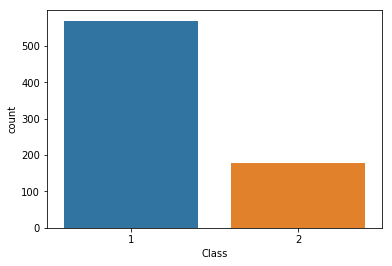

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(df['Class'])

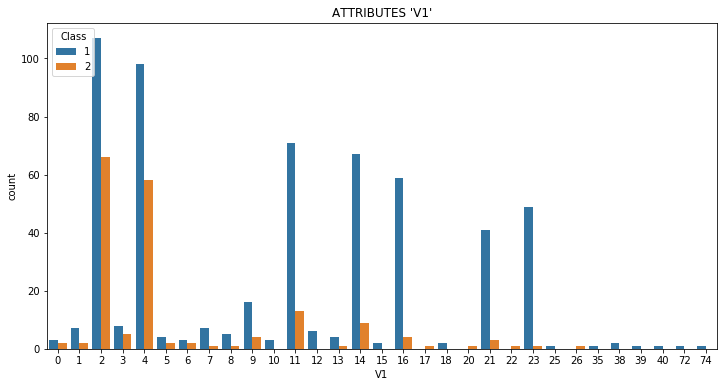

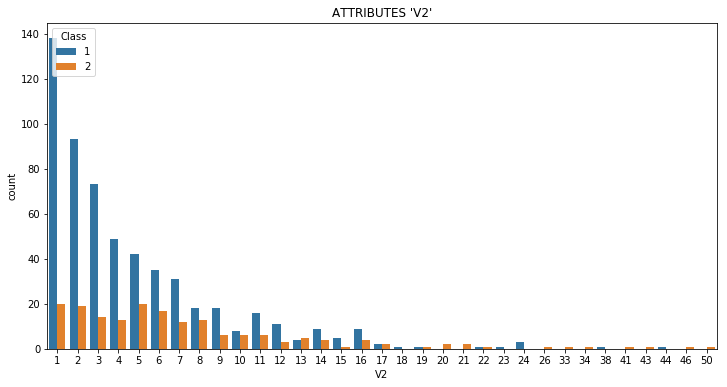

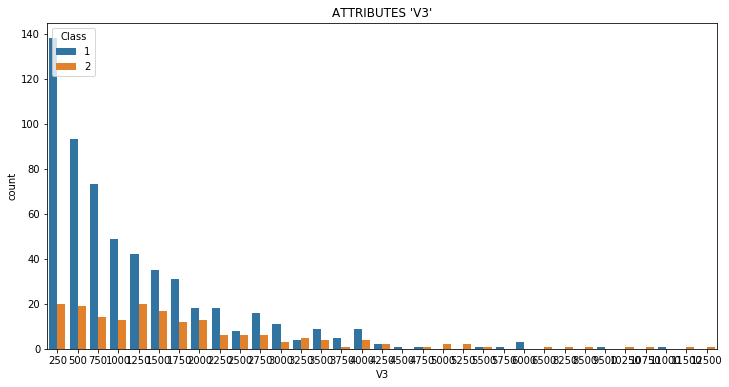

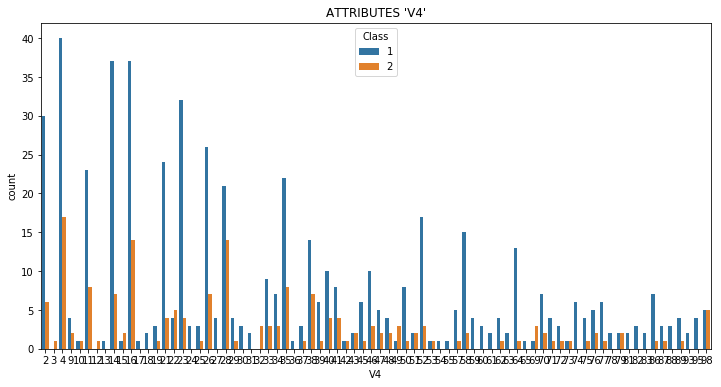

In [11]:
for i in df.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.countplot(df[i],hue=df['Class'])

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


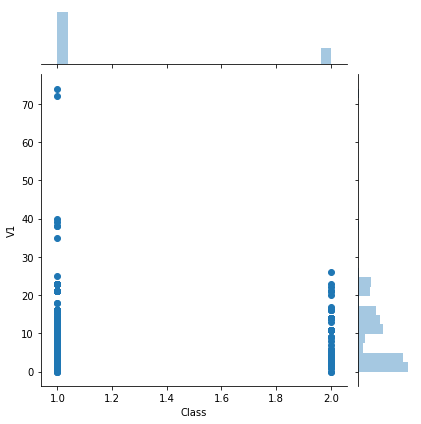

In [12]:
sns.jointplot(data=df, x='Class', y='V1')

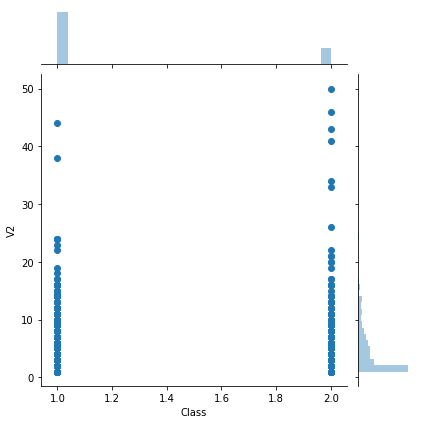

In [13]:
sns.jointplot(data=df, x='Class', y='V2')

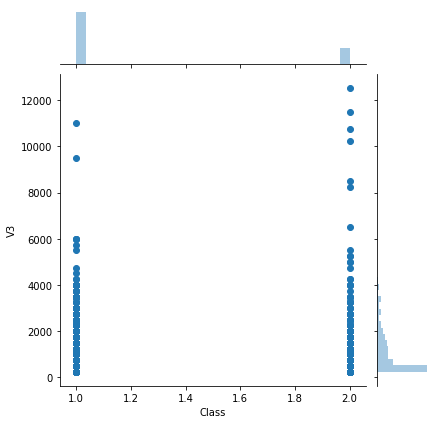

In [14]:
sns.jointplot(data=df, x='Class', y='V3')

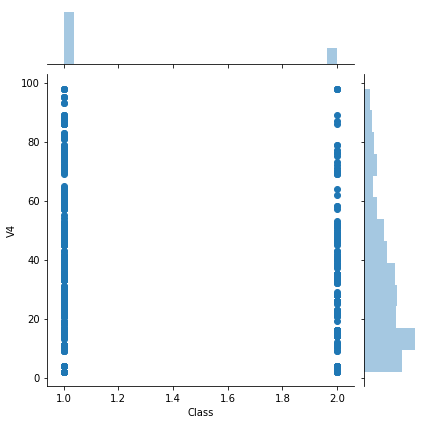

In [15]:
sns.jointplot(data=df, x='Class', y='V4')

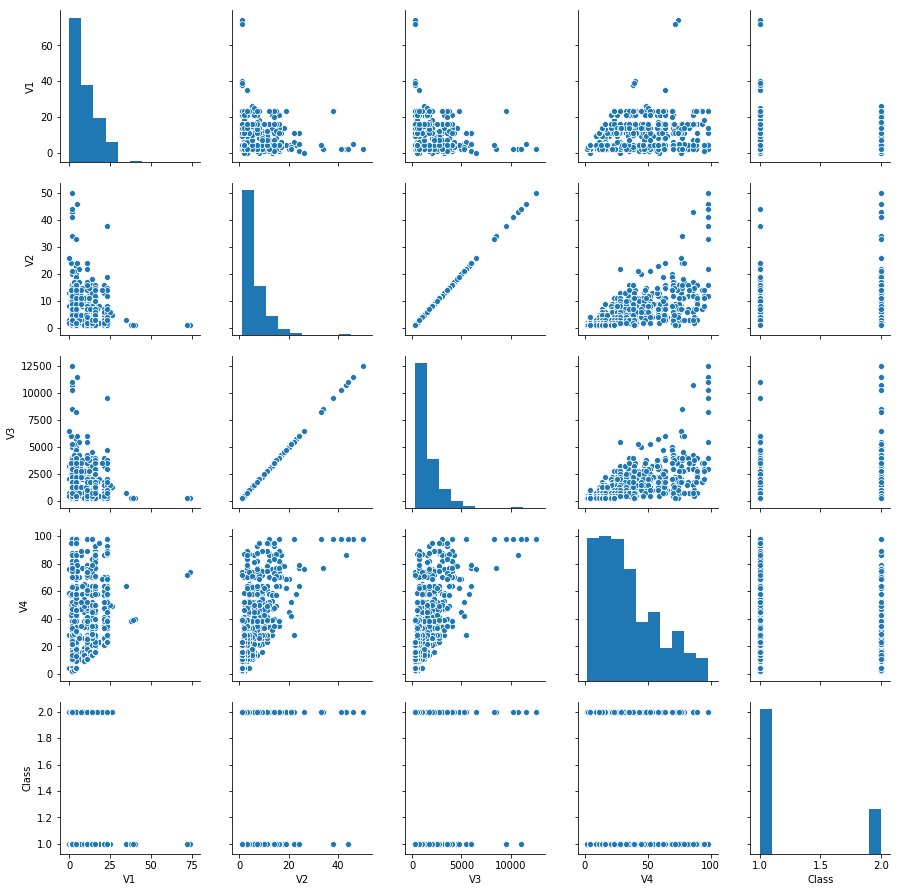

In [16]:
sns.pairplot(data=df)

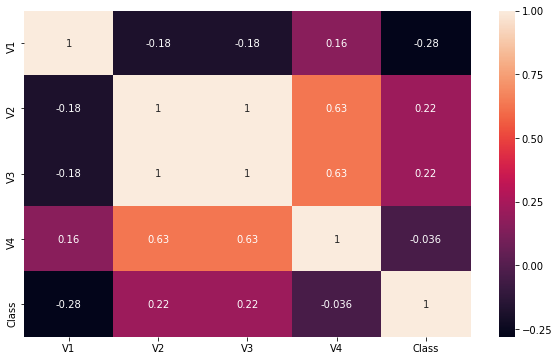

In [17]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [18]:
X = df.drop(['Class'], axis="columns")
X.head()

,V1,V2,V3,V4
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [19]:
y = df['Class']
y.head()

0    2
1    2
2    2
3    2
4    1
Name: Class, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
model.score(X_test, y_test)

0.7133333333333334

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
rfc.score(X_test, y_test)

0.7266666666666667

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
lr.score(X_test, y_test)

0.74